In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | nikolsk
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | acapulco
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | mach
Processing Record 7 of Set 1 | daye
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | oksfjord
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | champerico
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | bus

Processing Record 36 of Set 4 | norman wells
Processing Record 37 of Set 4 | fez
Processing Record 38 of Set 4 | anori
Processing Record 39 of Set 4 | skjervoy
Processing Record 40 of Set 4 | pacifica
Processing Record 41 of Set 4 | hobart
Processing Record 42 of Set 4 | bambous virieux
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | khanu woralaksaburi
Processing Record 45 of Set 4 | yerbogachen
Processing Record 46 of Set 4 | bacalar
Processing Record 47 of Set 4 | hami
Processing Record 48 of Set 4 | altamira
Processing Record 49 of Set 4 | nikolskoye
Processing Record 50 of Set 4 | crossville
Processing Record 1 of Set 5 | mandan
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | cayenne
Processing Record 4 of Set 5 | aljezur
Processing Record 5 of Set 5 | pafos
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | dauphin
Processing Record 8 of Set 5 | saint anthony
Processing Record 9 of Set 5 | darhan
Processing Record

City not found. Skipping...
Processing Record 30 of Set 8 | jackson
Processing Record 31 of Set 8 | lodwar
Processing Record 32 of Set 8 | batagay
Processing Record 33 of Set 8 | lillooet
Processing Record 34 of Set 8 | alice springs
Processing Record 35 of Set 8 | husavik
Processing Record 36 of Set 8 | roald
Processing Record 37 of Set 8 | ponta do sol
Processing Record 38 of Set 8 | brae
Processing Record 39 of Set 8 | davydivka
Processing Record 40 of Set 8 | dryden
Processing Record 41 of Set 8 | abu kamal
Processing Record 42 of Set 8 | krasnyy kholm
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | sur
Processing Record 45 of Set 8 | venado tuerto
Processing Record 46 of Set 8 | yarada
Processing Record 47 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 48 of Set 8 | saint george
Processing Record 49 of Set 8 | chalette-sur-loing
Processing Record 50 of Set 8 | kolosovka
Processing Record 1 of Set 9 | yeppo

Processing Record 14 of Set 12 | roros
Processing Record 15 of Set 12 | jieshi
Processing Record 16 of Set 12 | derzhavinsk
Processing Record 17 of Set 12 | la primavera
Processing Record 18 of Set 12 | emerald
Processing Record 19 of Set 12 | dunn
Processing Record 20 of Set 12 | chandler
Processing Record 21 of Set 12 | soresina
Processing Record 22 of Set 12 | sikasso
Processing Record 23 of Set 12 | marzuq
Processing Record 24 of Set 12 | rehoboth
Processing Record 25 of Set 12 | lingao
Processing Record 26 of Set 12 | zhezkazgan
Processing Record 27 of Set 12 | miraflores
Processing Record 28 of Set 12 | sao filipe
Processing Record 29 of Set 12 | morogoro
Processing Record 30 of Set 12 | molina
Processing Record 31 of Set 12 | sao jose da coroa grande
Processing Record 32 of Set 12 | gornji milanovac
Processing Record 33 of Set 12 | dhanwar
Processing Record 34 of Set 12 | usinsk
Processing Record 35 of Set 12 | kholtoson
Processing Record 36 of Set 12 | valparaiso
Processing Rec

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolsk,53.7189,46.0712,17.89,95,78,10.96,RU,2021-02-03 05:49:55
1,Bredasdorp,-34.5322,20.0403,60.80,94,0,2.30,ZA,2021-02-03 05:40:16
2,Acapulco,16.8634,-99.8901,74.28,76,0,3.11,MX,2021-02-03 05:40:45
3,Hithadhoo,-0.6000,73.0833,82.45,68,54,3.71,MV,2021-02-03 05:40:52
4,Mach,29.8637,67.3298,59.76,28,0,4.68,PK,2021-02-03 05:49:17


In [14]:
New_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[New_order]

In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

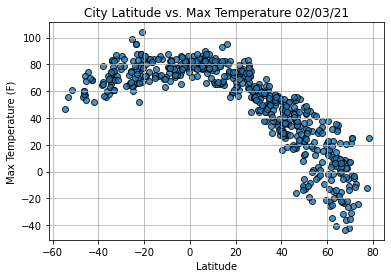

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

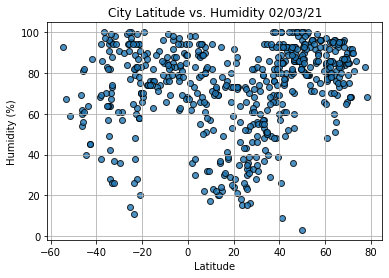

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

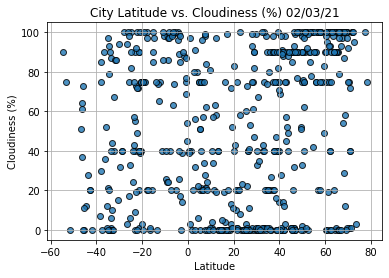

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

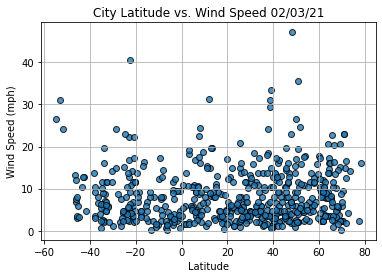

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()